In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math

Questão 1 : Alternativa B

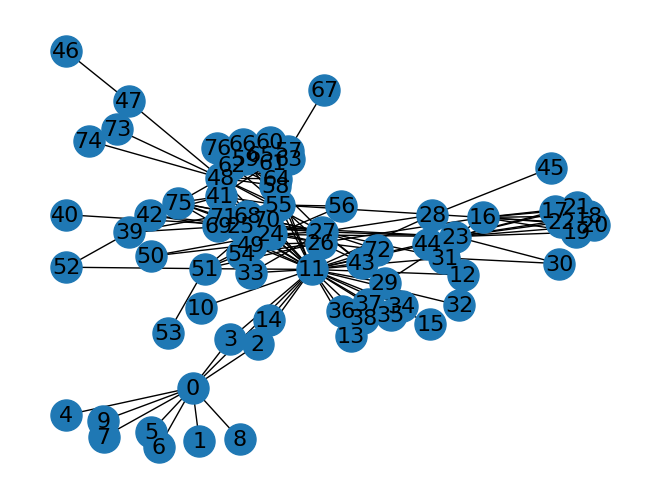

Terceiro Momento: 1408.025974025974
Quarto Momento: 33592.72727272727


In [ ]:
#Lê o grafo do arquivo
G=nx.read_gml("lesmis.gml")
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
G = nx.convert_node_labels_to_integers(G, first_label=0)

#Exibe o grafo
pos=nx.spring_layout(G)
nx.draw(G,with_labels=True,node_size=500,font_size=16,pos=pos)
plt.show(True)

#Função que calcula o n-ésimo momento
def obterMomento(G,n):
  aux=0
  for node in (G.nodes()):#Para todo grau
    aux+=len(list(G.neighbors(node)))**n#Incrementa a variável aux com o grau do nó elevado a n
  return aux/G.number_of_nodes();#Retorna a soma dividido pelo número de nós no grafo

#Exibe o que o enunciado exige
print("Terceiro Momento: "+str(obterMomento(G,3)))
print("Quarto Momento: "+str(obterMomento(G,4)))


Questão 2: Alternativa A

In [ ]:
#lê o arquivo e armazena as arestas em um array arestas
with open("powergrid.txt", 'r') as file:
  arestas=[]
  for linha in file:
    vertices=linha.strip().split()
    arestas.append((vertices[0],vertices[1]))

#Limpa o G e cria o grafo a partir do vetor
G=nx.Graph()
G=nx.Graph(arestas)
G = nx.convert_node_labels_to_integers(G, first_label=0)

def CalcularComplexidade(G):
  return obterMomento(G,2)/obterMomento(G,1)

print("Complexidade: "+str(CalcularComplexidade(G)))

Complexidade: 3.8712465878070974


Questão 3: Alternativa C

In [ ]:
#Retorna um vetor com o grau de cada nó
def obterGraus(G):
  aux=[]
  for node in G.nodes():
    aux.append(len(list(G.neighbors(node))))
  return aux;

#Retorna um vetor com a distribuição do grau
def calcularDistribuicaoGrau(G):
  graus=obterGraus(G)#Obtém o vetor com os graus de cada nó

  #Encontra o maior grau
  maior=graus[0]
  for i in graus:
    if i>maior:
      maior=i

  aux=np.zeros(shape=(maior+1)) #Cria um vetor para armzenar a distribuição
  for i in range(0,maior+1):
    aux[i]=graus.count(i)
    aux[i]=aux[i]/G.number_of_nodes()

  return aux #Retorna a distribuição


#Calcula a entropia de shannon
def calcularEntropiaShannon(G):

  aux=calcularDistribuicaoGrau(G)#Obtém a distribuição
  soma=0

  for i in aux:#Para cada probabilidade
    if i!=0:
      soma+=i*math.log2(i)

  return (-1)*soma #Retorna a entropia de Shannon

#lê o arquivo e armazena as arestas em um array arestas
with open("euroroad.txt", 'r') as file:
  arestas=[]
  for linha in file:
    vertices=linha.strip().split()
    arestas.append((vertices[0],vertices[1]))

#Limpa o G e cria o grafo a partir do vetor
G=nx.Graph()
G=nx.Graph(arestas)
G = nx.convert_node_labels_to_integers(G, first_label=0)


print("Entropia da Shannon: "+str(calcularEntropiaShannon(G)))

Entropia da Shannon: 2.0033103874527756


Questão 4: Alternativa B

In [ ]:
#Retorna a transitividade do grafo
def calcularTransitividade(G):
  total_triangulos=0;
  triplas=0
  for node in G.nodes():#Para todo nó do grafo
    triplas+=len(list(G.neighbors(node)))*(len(list(G.neighbors(node)))-1)/2 #O número de triplas recebe o número de combinações de k, 2 a 2

    #Para todas as duplas de vizinhos do nó atual
    for i in G.neighbors(node):
      for j in G.neighbors(node):
        if i!=j and G.has_edge(i,j):#Se tiver uma aresta entre 2 vizinhos do nó atual então há 1 triângulo
          total_triangulos+=1

  total_triangulos=total_triangulos/6 #Todo triângulo é contado 6 vezes então divide por 6 para obter o número real de triângulos
  return 3*total_triangulos/triplas #Retorna a transitividade

with open("usairport.txt", 'r') as file:
  arestas=[]
  for linha in file:
    vertices=linha.strip().split()
    arestas.append((vertices[0],vertices[1]))

#Limpa o G e cria o grafo a partir do vetor
G=nx.Graph()
G=nx.Graph(arestas)
G = nx.convert_node_labels_to_integers(G, first_label=0)

print("Transitividade: "+str(calcularTransitividade(G)))
print("Average Clustering Coefficient: "+str(nx.average_clustering(G)))

Transitividade: 0.38414344664491556
Average Clustering Coefficient: 0.5041525392095769


Questão 5: Alternativa C

In [ ]:
with open("usairport.txt", 'r') as file:
  arestas=[]
  for linha in file:
    vertices=linha.strip().split()
    arestas.append((vertices[0],vertices[1]))

#Limpa o G e cria o grafo a partir do vetor
G=nx.Graph()
G=nx.Graph(arestas)
G = nx.convert_node_labels_to_integers(G, first_label=0)

print("Complexidade: "+str(CalcularComplexidade(G)))
print("Entropia de Shannon: "+str(calcularEntropiaShannon(G)))

Complexidade: 112.22224803950043
Entropia de Shannon: 4.985977646539227
